In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [2]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [3]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [4]:
### Your code is here
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [5]:
numeric_columns = df.loc[:, df.dtypes != np.object]
categorical_columns = df.loc[:, df.dtypes == np.object]
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_columns:
    most_popular = df.groupby('Type_of_Cab').size().sort_values().index[-1]
    df[col] = df[col].fillna(most_popular)

In [6]:
categorical_columns.describe()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


In [7]:
for col in categorical_columns:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

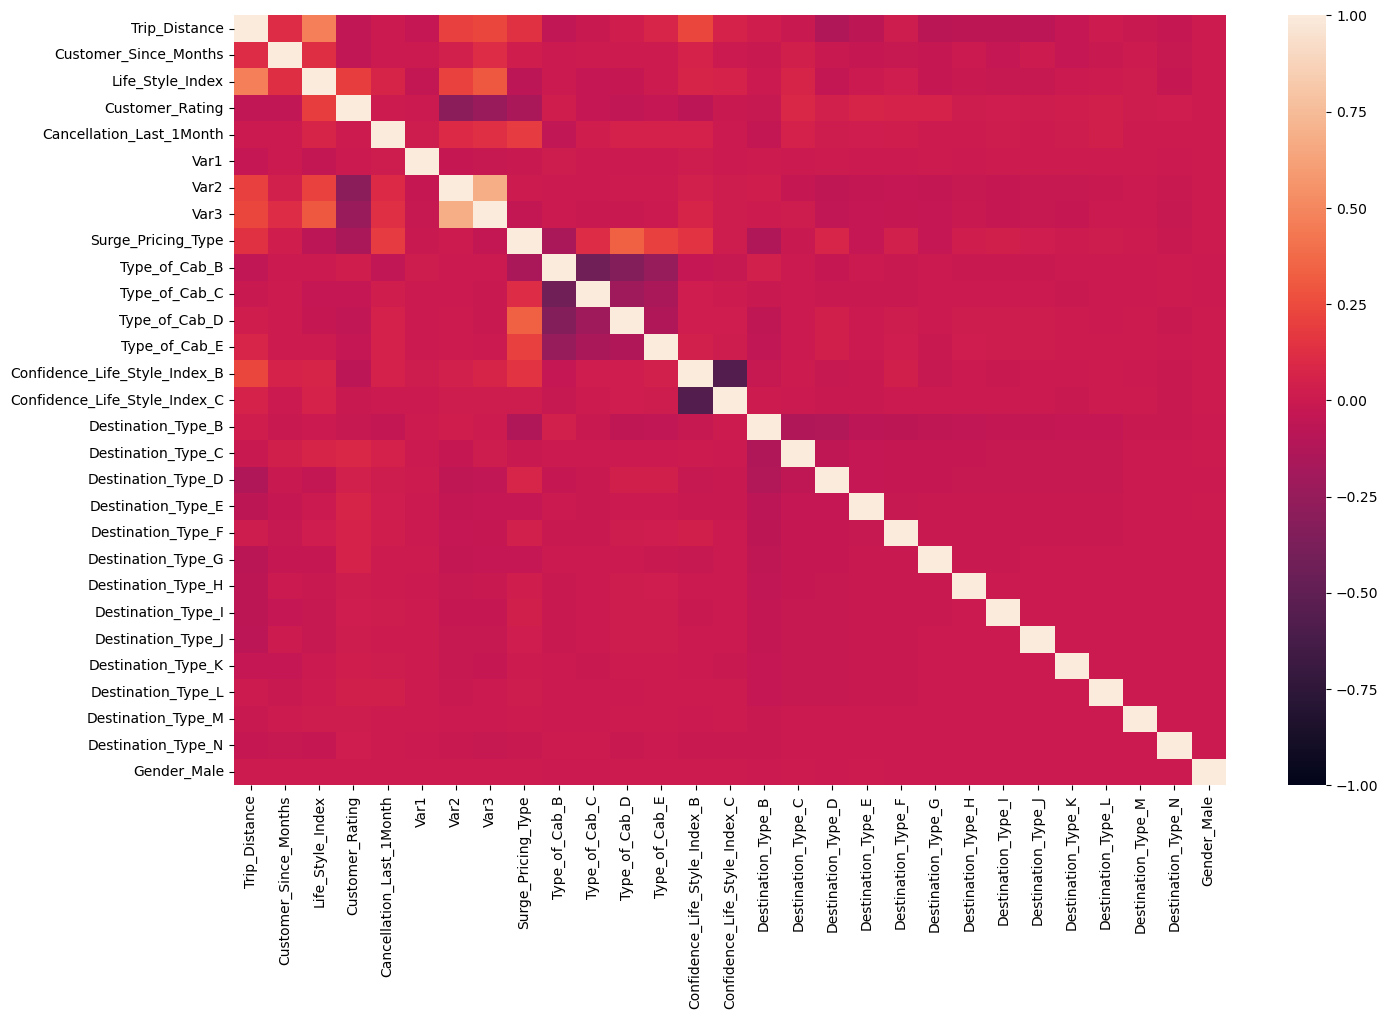

In [8]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(df.corr(),
           vmax=1,
           vmin=-1)

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top five correlation pairs:")
get_top_abs_correlations(df, 5)

Top five correlation pairs:


Var2                           Var3                             0.683437
Confidence_Life_Style_Index_B  Confidence_Life_Style_Index_C    0.565692
Trip_Distance                  Life_Style_Index                 0.468332
Type_of_Cab_B                  Type_of_Cab_C                    0.416698
Surge_Pricing_Type             Type_of_Cab_D                    0.333639
dtype: float64

### Training

In [10]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report

### Your code is here
pipe_one_all = Pipeline([('scaler', StandardScaler()), ('one_vs_all', OneVsRestClassifier(LogisticRegression()))])
pipe_one_all.fit(X_train, y_train)
print(classification_report(y_test, pipe_one_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [13]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [14]:
### Your code is here
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe_one_all, param_grid, cv=5)
search.fit(X_train, y_train)

print("Best accuracy:", search.best_score_.round(3))
print("Best params:", search.best_params_)
print(classification_report(y_test, search.predict(X_test), digits=3))

Best accuracy: 0.681
Best params: {'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [15]:
### Your code is here
from sklearn.calibration import CalibrationDisplay
zero_vs_all = search.predict_proba(X_test)[:, 0]
first_vs_all = search.predict_proba(X_test)[:, 1]
second_vs_all = search.predict_proba(X_test)[:, 2]
target_dummies = pd.get_dummies(df['Surge_Pricing_Type'], prefix='Surge_Pricing_Type')
target_dummies.head()

,Surge_Pricing_Type_1,Surge_Pricing_Type_2,Surge_Pricing_Type_3
Trip_ID,,,
T0005689460,0,1,0
T0005689461,0,1,0
T0005689464,0,1,0
T0005689465,0,0,1
T0005689467,0,1,0


Text(0.5, 1.0, 'Калибровочная кривая для 0_vs_all')

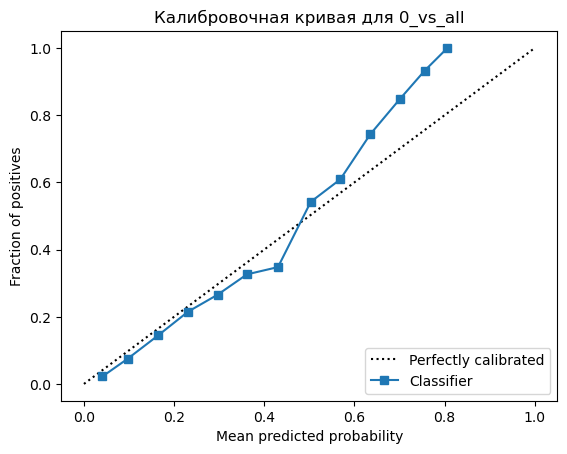

In [16]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_1'], zero_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 0_vs_all")

Text(0.5, 1.0, 'Калибровочная кривая для 1_vs_all')

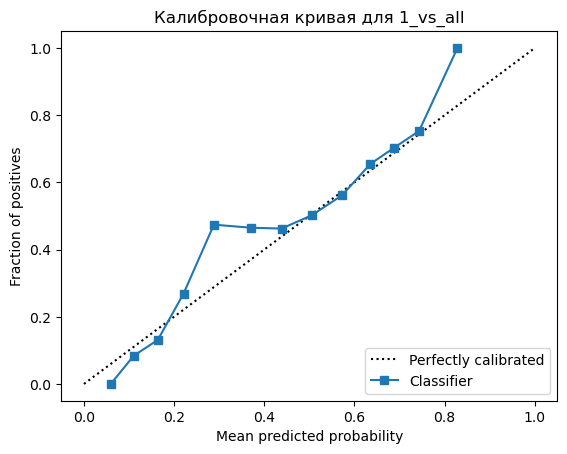

In [17]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_2'], first_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 1_vs_all")

Text(0.5, 1.0, 'Калибровочная кривая для 2_vs_all')

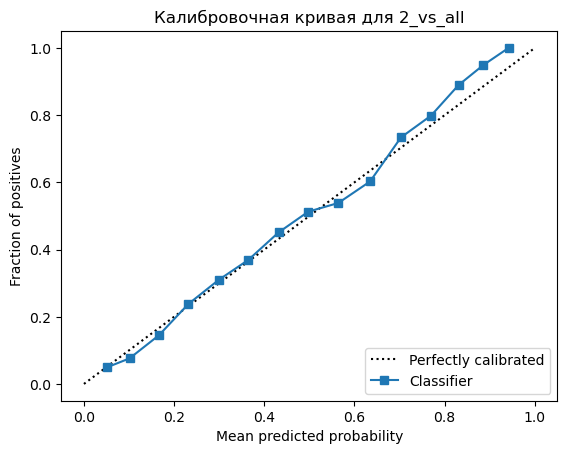

In [18]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_3'], second_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 2_vs_all")

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [19]:
### Создание полиномиальных признаков
### Your code is here
X_polinomial = X.copy()
numeric_columns = numeric_columns.drop('Surge_Pricing_Type', axis=1)
for col in numeric_columns:
    for power in [2, 3, 4]:
        to_add = (X_polinomial[col] ** power).rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)
X_polinomial.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Var2,Var2_3,Var2_3,Var2_4,Var2_4,Var3,Var3_3,Var3_3,Var3_4,Var3_4
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,2116,97336,9474296896,4477456,20047612231936,3600,216000,46656000000,12960000,167961600000000
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,3136,175616,30840979456,9834496,96717311574016,6084,474552,225199600704,37015056,1370114370683136
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,3136,175616,30840979456,9834496,96717311574016,5929,456533,208422380089,35153041,1235736291547681
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,2704,140608,19770609664,7311616,53459728531456,5476,405224,164206490176,29986576,899194740203776
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,2401,117649,13841287201,5764801,33232930569601,10404,1061208,1126162419264,108243216,11716593810022656


In [20]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [21]:
### Your code is here
pipe_one_all = Pipeline([('scaler', StandardScaler()),
                         ('one_vs_all', OneVsRestClassifier(LogisticRegression(C=0.001, penalty='l2')))])
pipe_one_all.fit(X_pol_train, y_train)

print(classification_report(y_test, pipe_one_all.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.749     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.683     26333
   macro avg      0.709     0.651     0.666     26333
weighted avg      0.697     0.683     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

In [22]:
### Your code is here
zero_vs_all = pipe_one_all.predict_proba(X_pol_test)[:, 0]
first_vs_all = pipe_one_all.predict_proba(X_pol_test)[:, 1]
second_vs_all = pipe_one_all.predict_proba(X_pol_test)[:, 2]

Text(0.5, 1.0, 'Калибровочная кривая для 0_vs_all')

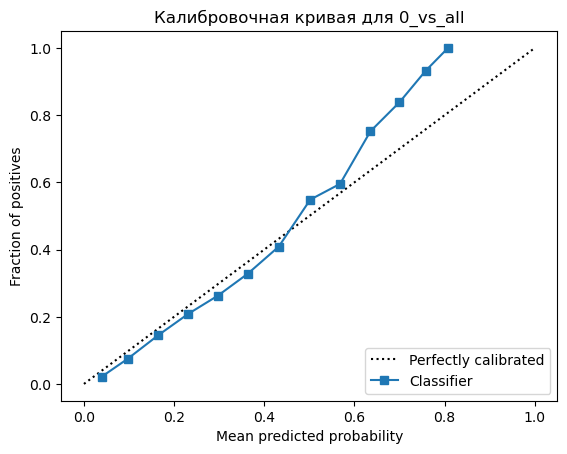

In [23]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_1'], zero_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 0_vs_all")

Text(0.5, 1.0, 'Калибровочная кривая для 1_vs_all')

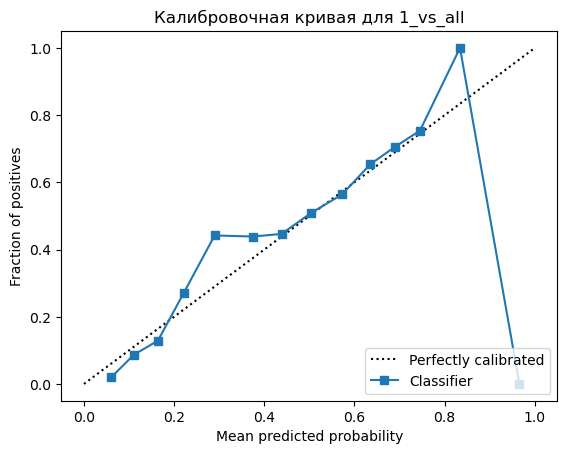

In [24]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_2'], first_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 1_vs_all")

Text(0.5, 1.0, 'Калибровочная кривая для 2_vs_all')

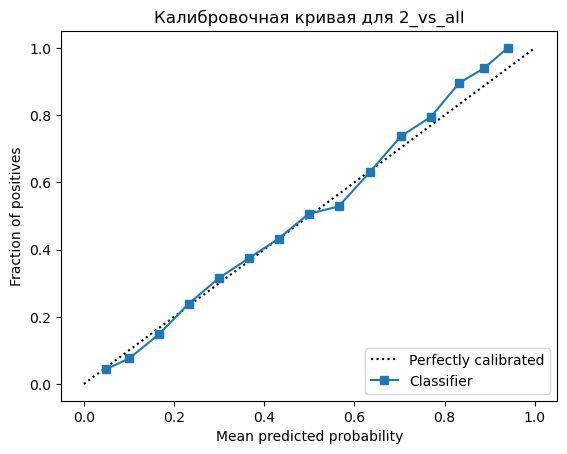

In [25]:
CalibrationDisplay.from_predictions(target_dummies.loc[y_test.index]['Surge_Pricing_Type_3'], second_vs_all, n_bins=15)
plt.title("Калибровочная кривая для 2_vs_all")

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [26]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_one_one = Pipeline([("scaler", StandardScaler()), ("one_vs_one", OneVsOneClassifier(SGDClassifier()))])
pipe_one_one.fit(X_train, y_train)
print(classification_report(y_test, pipe_one_one.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.521     0.614      5372
           2      0.626     0.870     0.728     11349
           3      0.756     0.536     0.627      9612

    accuracy                          0.677     26333
   macro avg      0.710     0.642     0.656     26333
weighted avg      0.698     0.677     0.668     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [28]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [29]:
### Your code is here
search = GridSearchCV(pipe_one_one, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best accuracy:", search.best_score_.round(3))
print("Best params:", search.best_params_)
print(classification_report(y_test, search.predict(X_test), digits=3))

Best accuracy: 0.681
Best params: {'one_vs_one__estimator__alpha': 0.1, 'one_vs_one__estimator__loss': 'modified_huber', 'one_vs_one__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.748     0.529     0.620      5372
           2      0.633     0.845     0.724     11349
           3      0.745     0.572     0.647      9612

    accuracy                          0.681     26333
   macro avg      0.709     0.649     0.663     26333
weighted avg      0.697     0.681     0.675     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?